<h2>Pairs Trading</h2>
Trade idea: Analyzing a pair of stocks with some underlying economic link and modeling their relationship. If both the assets move similarly, this strategy helps us to maximize our returns when the spread between both the securities increases.
We go long the relatively undervalued security, go short the relatively overvalued security and hold the trade until the spread closes or goes in the other direction.

In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

import seaborn as sn
from matplotlib.pyplot import figure

In [2]:
start_date='2020-01-01'
end_date='2024-12-31'
list = ['AXON', 'BA', 'GE', 'MSFT', 'HWM', 'BRK-B', 'LHX', 'LMT', 'NOC', 'RTX', 'TXT', 'TDG']

data = pd.DataFrame()
d = yf.download(list,start=start_date,end=end_date).iloc[:,:len(list)]
data = pd.concat([data,d])
data.columns = data.columns.get_level_values(1)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  12 of 12 completed


Ticker,AXON,BA,BRK-B,GE,HWM,LHX,LMT,MSFT,NOC,RTX,TDG,TXT
Date,,,,,,,,,,,,
2020-01-02,76.559998,331.348572,228.389999,58.053146,31.157572,182.841049,346.832733,153.323273,326.278870,84.667381,504.052063,45.169605
2020-01-03,73.930000,330.791901,226.179993,58.247791,31.108175,189.280197,359.312317,151.414108,343.991669,84.783485,513.290283,44.434669
2020-01-06,68.750000,331.766083,226.990005,59.075035,30.831566,190.404343,358.765198,151.805496,344.743835,84.965935,519.472778,44.474388
2020-01-07,69.769997,335.285156,225.919998,58.637074,31.029144,191.312653,359.972382,150.421371,343.954956,84.695030,521.426941,44.454514
2020-01-08,69.610001,329.410095,225.990005,58.101803,30.347513,190.017639,356.958832,152.817307,339.662079,84.822189,520.210022,43.868542


In [3]:
corr_matrix = data.corr()
corr_matrix

Ticker,AXON,BA,BRK-B,GE,HWM,LHX,LMT,MSFT,NOC,RTX,TDG,TXT
Ticker,,,,,,,,,,,,
AXON,1.000000,-0.134151,0.852063,0.899155,0.937184,0.485834,0.734598,0.824456,0.583053,0.750488,0.884564,0.693802
BA,-0.134151,1.000000,-0.121868,-0.061141,-0.140636,-0.146437,-0.227382,-0.117965,-0.278658,-0.056270,-0.060778,0.031292
BRK-B,0.852063,-0.121868,1.000000,0.901871,0.931068,0.647360,0.845156,0.938358,0.800088,0.877861,0.930509,0.914427
GE,0.899155,-0.061141,0.901871,1.000000,0.963010,0.497800,0.773455,0.891535,0.587313,0.780209,0.979809,0.755659
HWM,0.937184,-0.140636,0.931068,0.963010,1.000000,0.593807,0.848398,0.872347,0.700046,0.857325,0.960575,0.764015
LHX,0.485834,-0.146437,0.647360,0.497800,0.593807,1.000000,0.577548,0.539869,0.657057,0.800396,0.503734,0.673326
LMT,0.734598,-0.227382,0.845156,0.773455,0.848398,0.577548,1.000000,0.699215,0.884667,0.861038,0.810050,0.679023
MSFT,0.824456,-0.117965,0.938358,0.891535,0.872347,0.539869,0.699215,1.000000,0.657213,0.746208,0.920413,0.884897
NOC,0.583053,-0.278658,0.800088,0.587313,0.700046,0.657057,0.884667,0.657213,1.000000,0.822046,0.661628,0.758650


<Axes: xlabel='Ticker', ylabel='Ticker'>

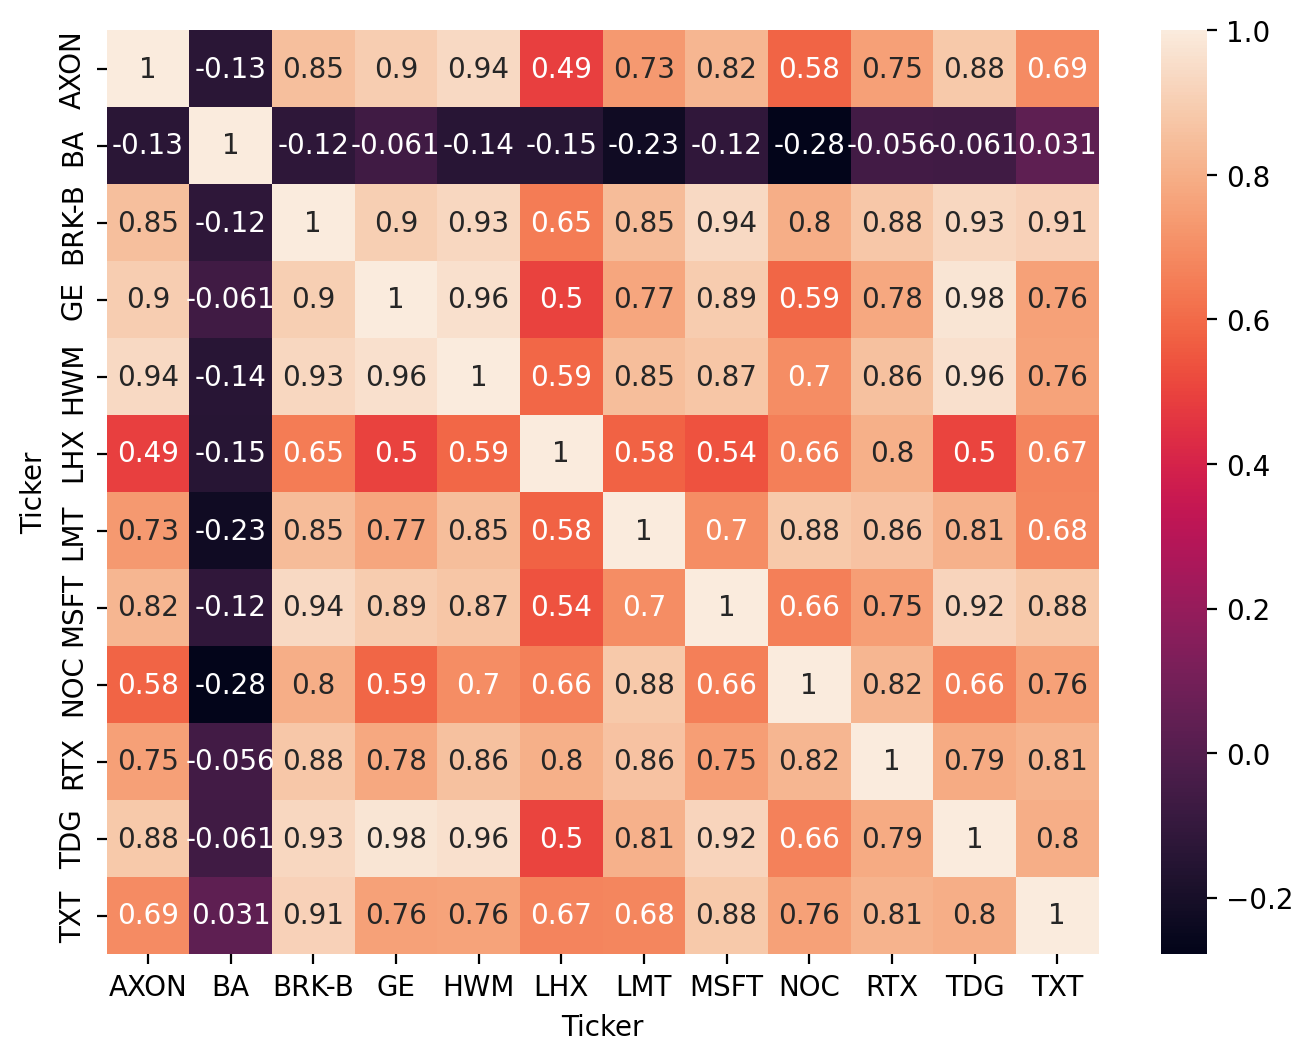

In [4]:
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

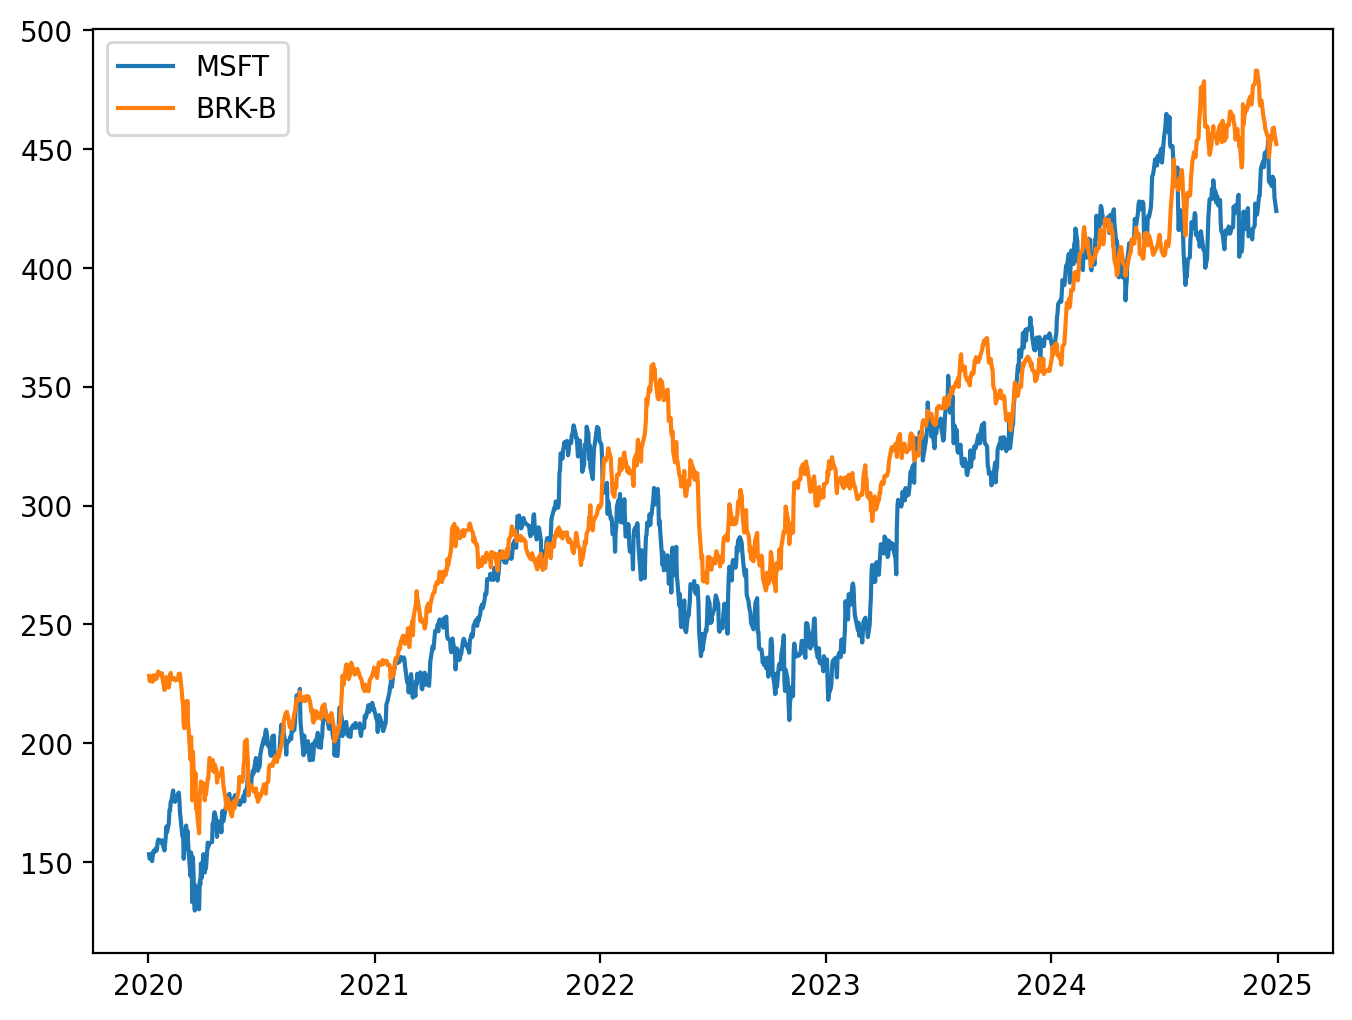

In [6]:
stock1 = 'MSFT'
stock2 = 'BRK-B'

import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
stock1_data = data[stock1] # GE Aerospace
stock2_data = data[stock2] # TransDigm Group
# HOWEVER, let's check out the relationship between the stocks...
plt.plot(stock1_data, label = stock1)
plt.plot(stock2_data, label = stock2)
plt.legend()
# oh... that's why the correlation seem very high. The data are not 'standardized.'
# Let's look at a different one...

Text(0.5, 1.0, 'Spread between BRK-B and MSFT')

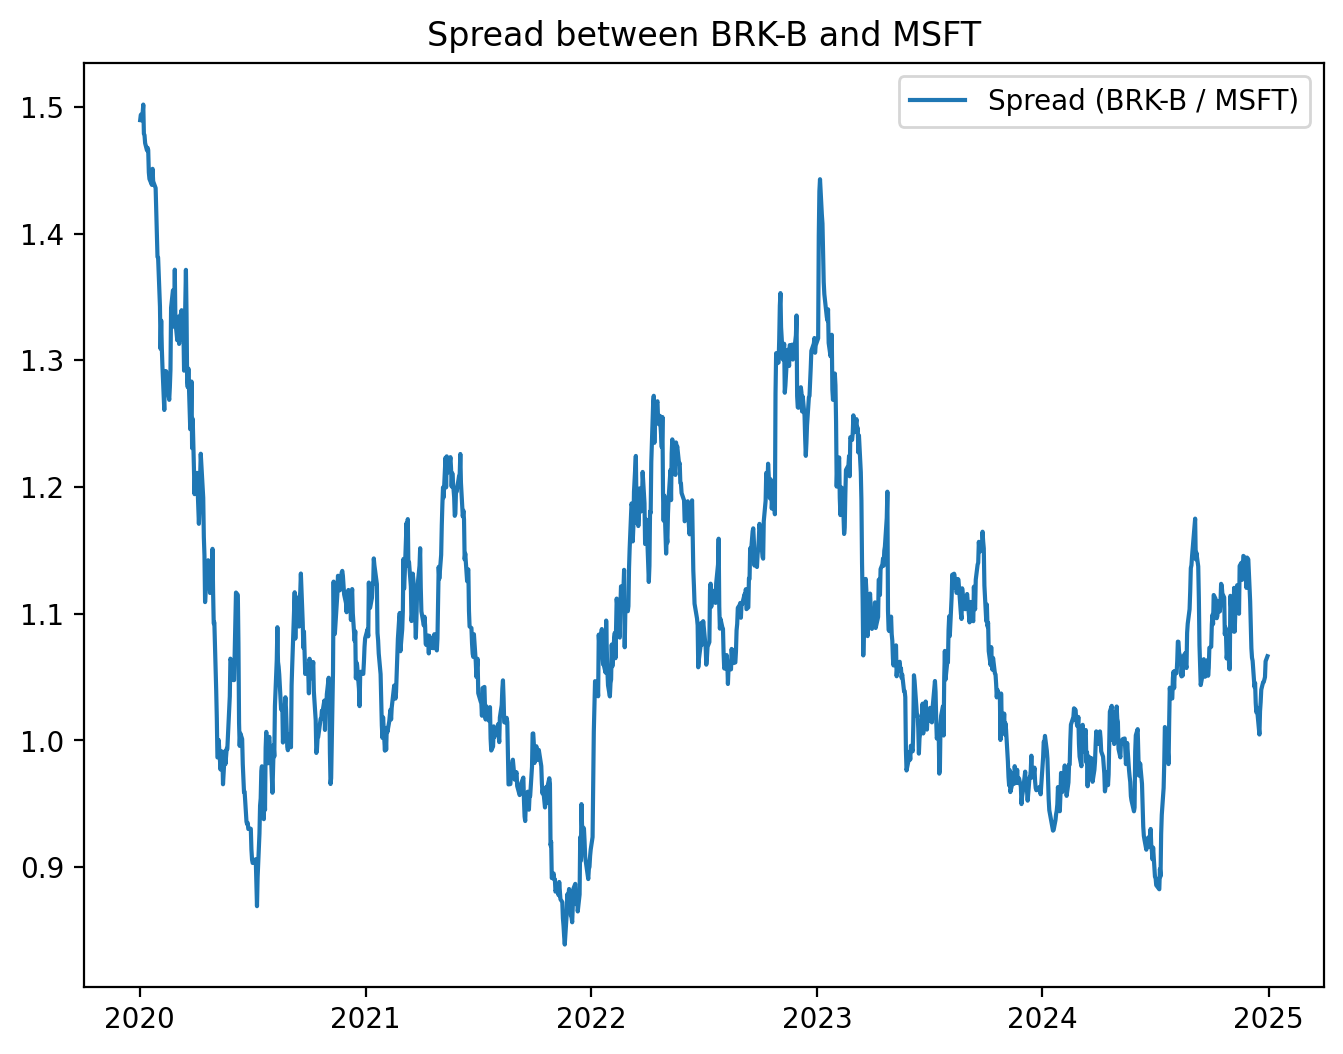

In [7]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(stock2_data/stock1_data, label = f'Spread ({stock2} / {stock1})')
plt.legend()
plt.title(f"Spread between {stock2} and {stock1}")

In [8]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(stock1_data, stock2_data)

In [9]:
result

(np.float64(-3.270872508227557),
 np.float64(0.058853376322247776),
 array([-3.90518092, -3.34099905, -3.04782848]))

In [10]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.058853376322247776


In [11]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for GE and TDG
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for GE
stock1_ADF = adfuller(stock1_data)
print('P value for the Augmented Dickey-Fuller Test is', stock1_ADF[1])
stock2_ADF = adfuller(stock2_data)
print('P value for the Augmented Dickey-Fuller Test is', stock2_ADF[1])
Spread_ADF = adfuller(stock1_data - stock2_data)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(stock2_data / stock1_data)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.7727660967204579
P value for the Augmented Dickey-Fuller Test is 0.9479885854059007
P value for the Augmented Dickey-Fuller Test is 0.016257954348276135
P value for the Augmented Dickey-Fuller Test is 0.0027751732171091446


Text(0.5, 1.0, 'Price Ratio between BRK-B and MSFT')

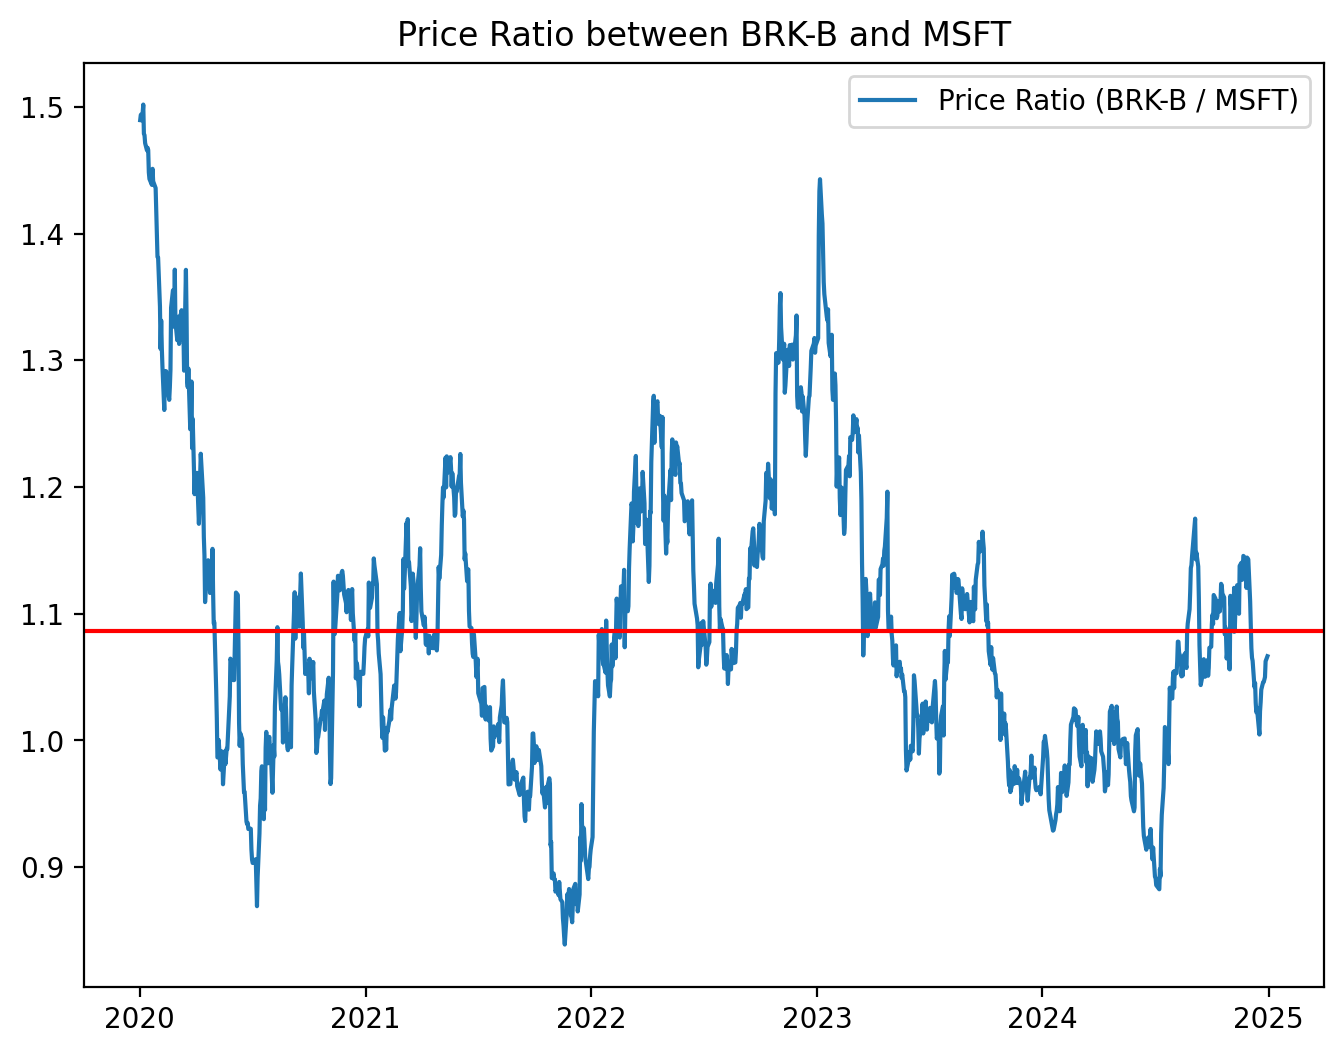

In [12]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = stock2_data / stock1_data
plt.plot(ratio, label = f"Price Ratio ({stock2} / {stock1})")
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title(f"Price Ratio between {stock2} and {stock1}")

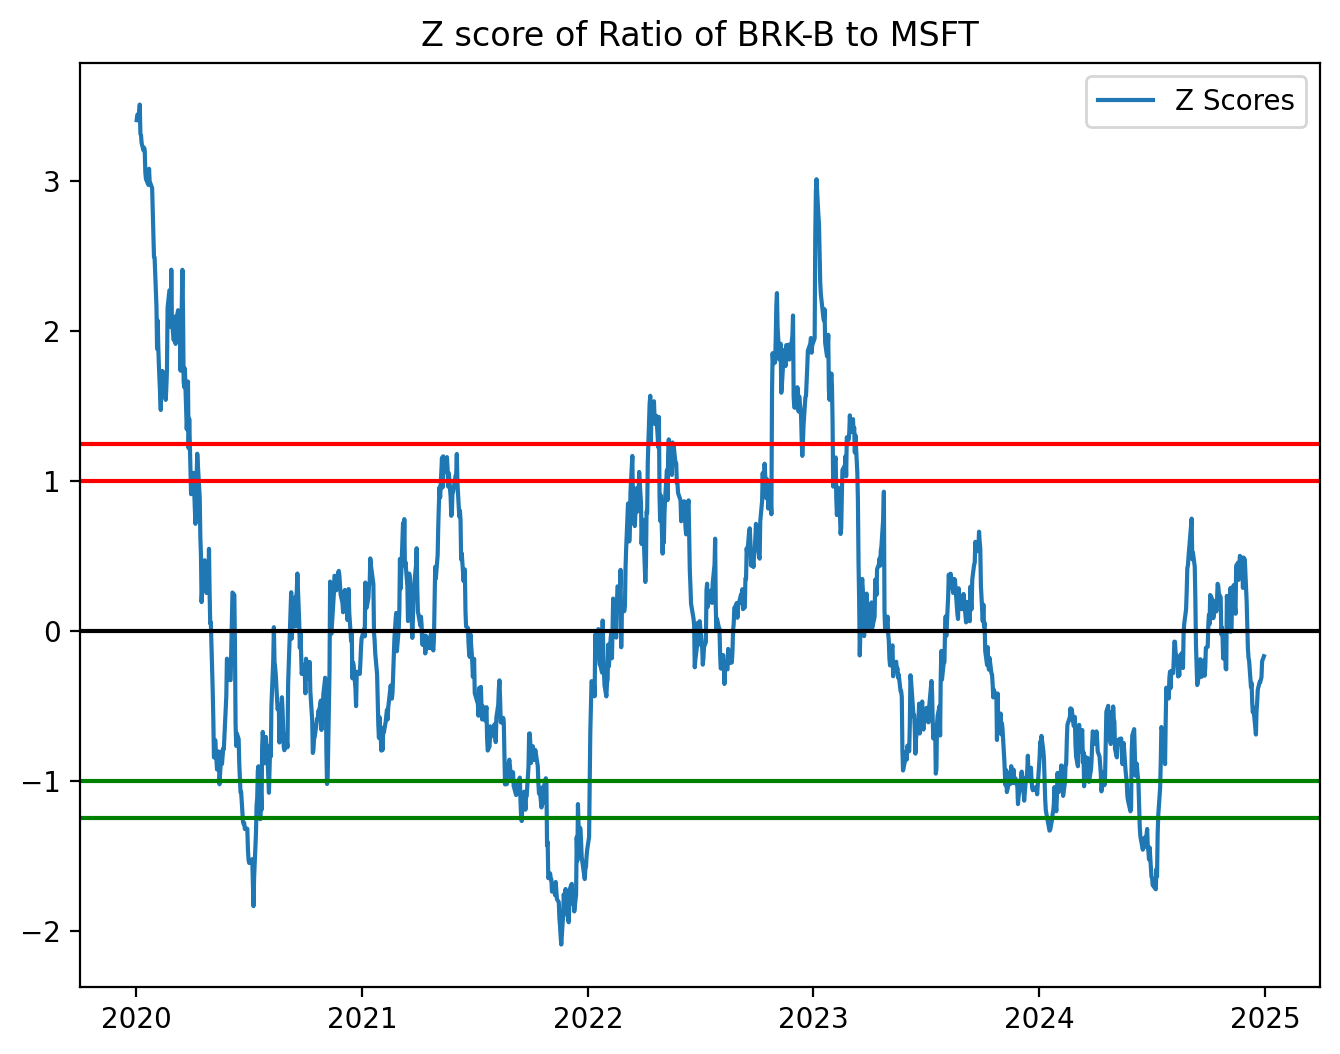

In [13]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title(f'Z score of Ratio of {stock2} to {stock1}')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

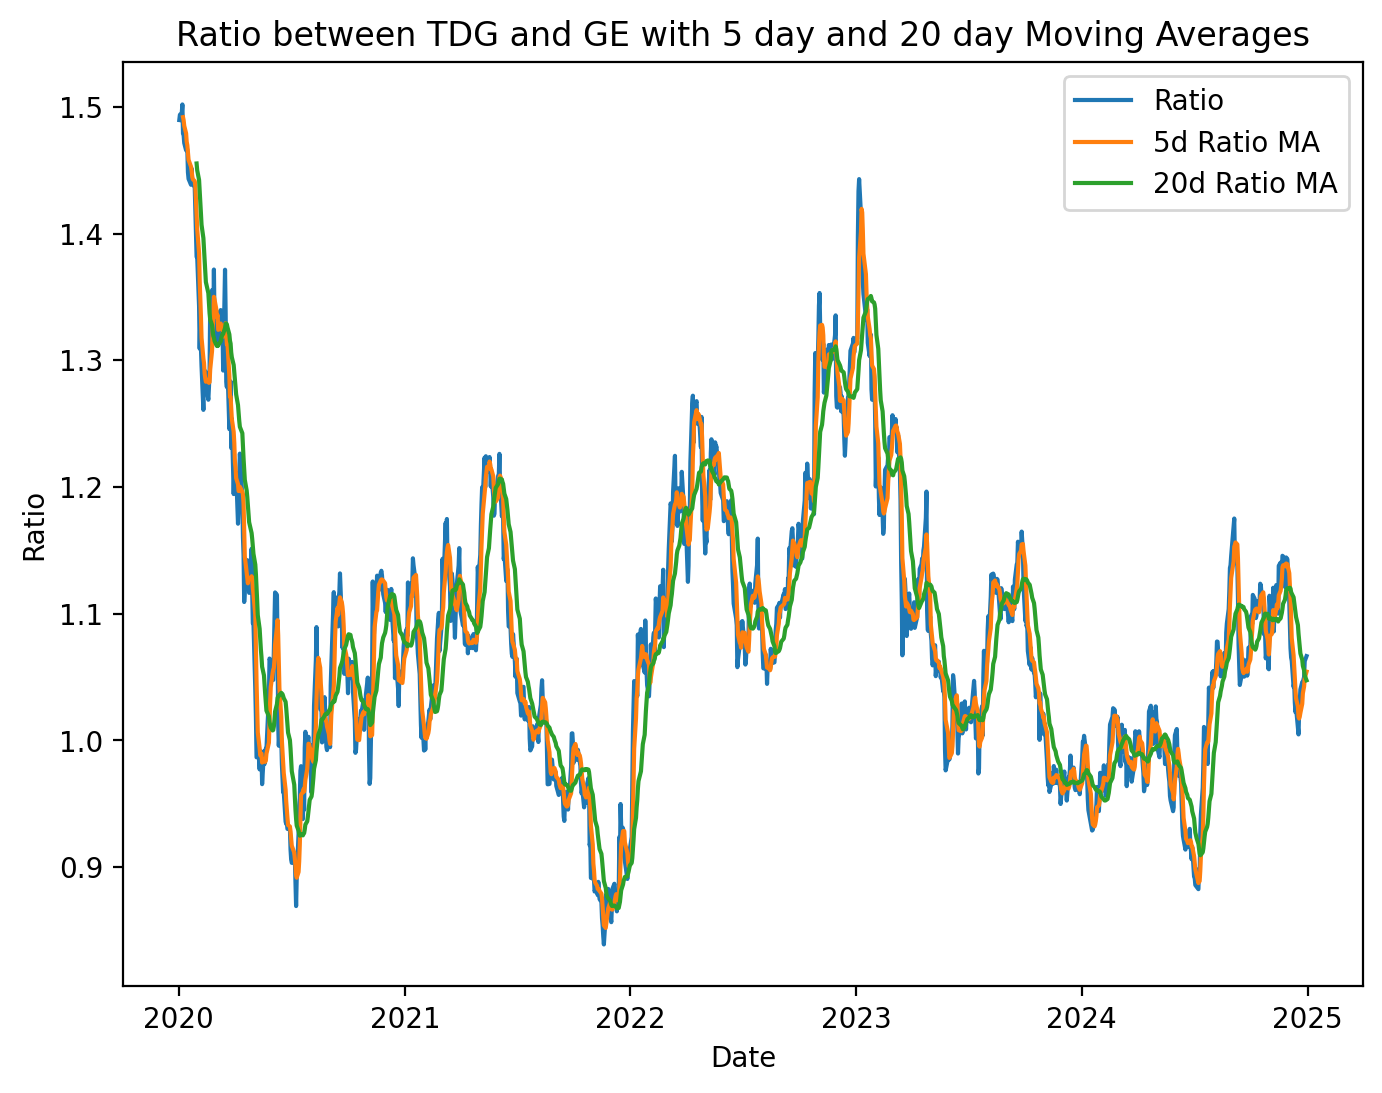

In [14]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between TDG and GE with 5 day and 20 day Moving Averages')
plt.show()

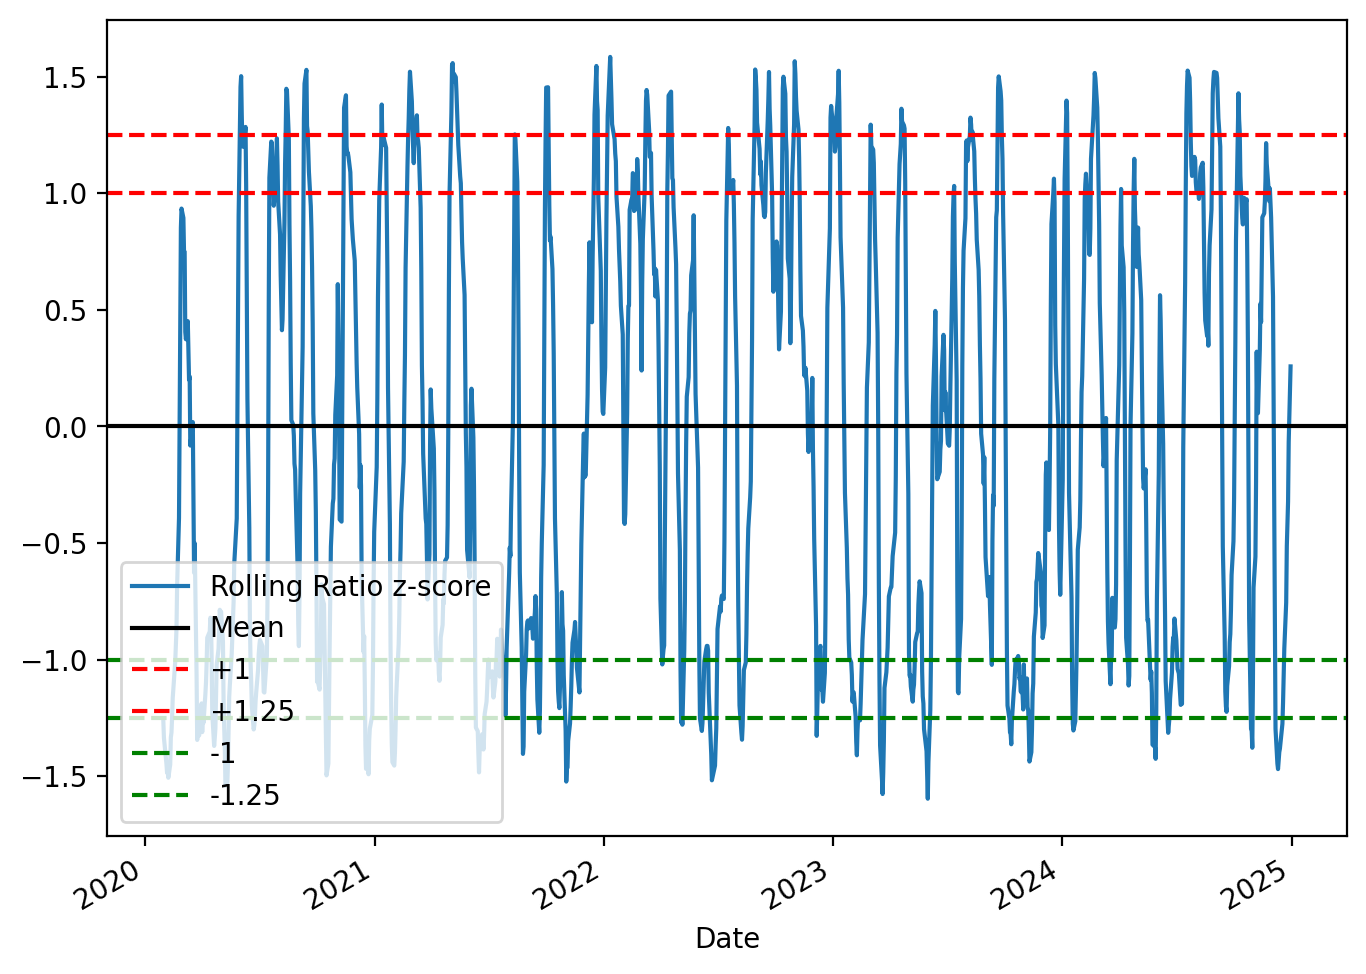

In [15]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'], loc=3)
plt.show()

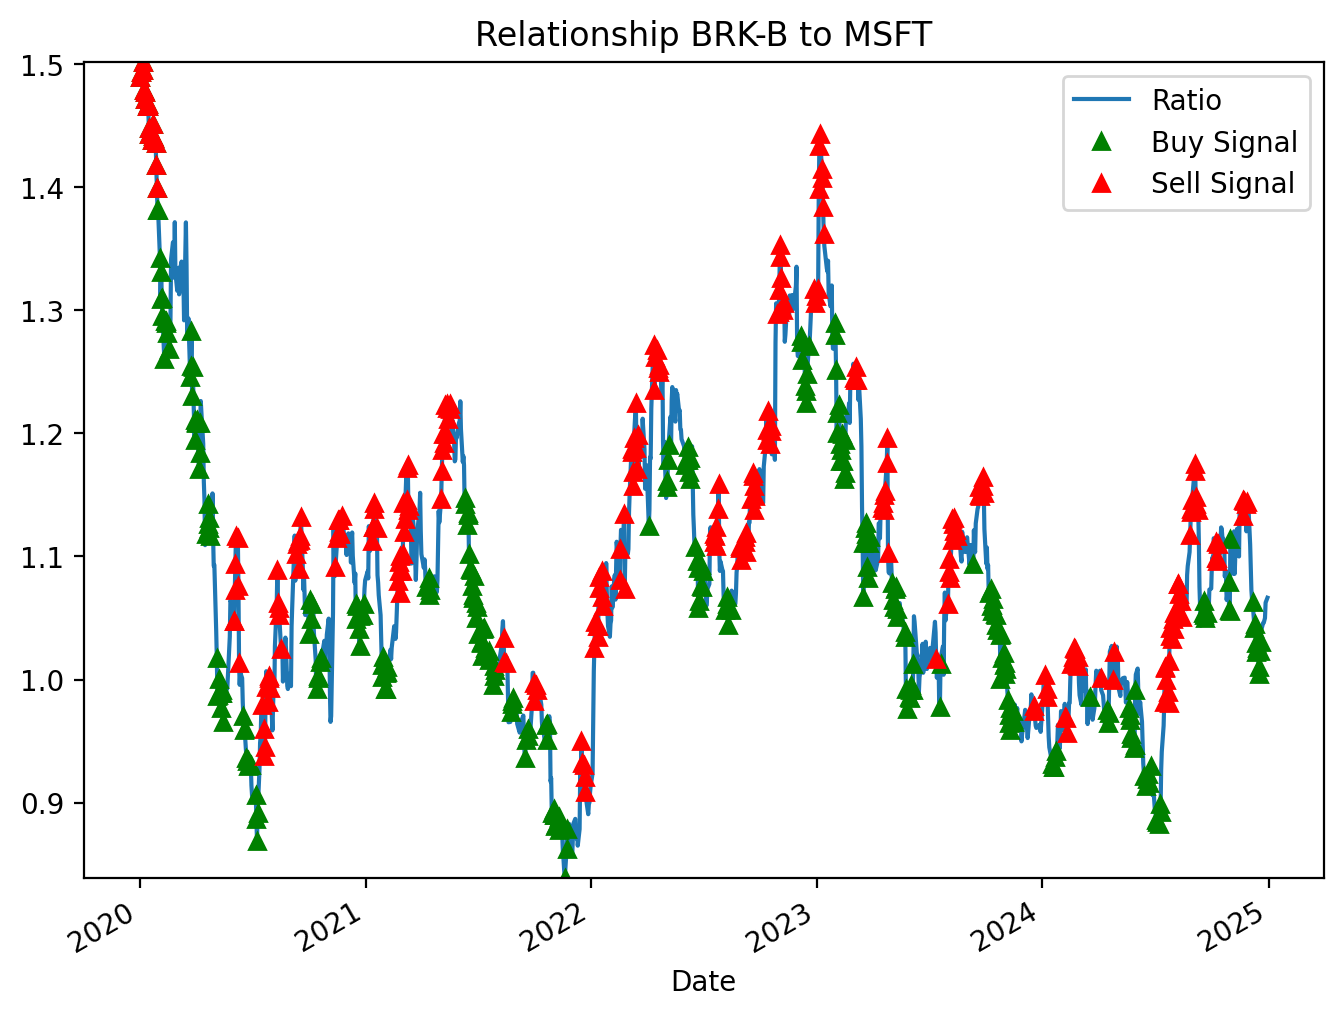

In [16]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title(f'Relationship {stock2} to {stock1}')
plt.show()